THIS PROJECT USES A SYNTHETIC TIME SERIES DATASET , AS A DATASET WAS NOT GIVEN , I HAVE USED ARIMA MODEL ,USED RMSE AND TRAINED ,
TESTED THE DATASET AND PLOTTED THE TIME SERIES FORECAST.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating a synthetic time series dataset
np.random.seed(42)
time_steps = 100
time_series_data = np.cumsum(np.random.randn(time_steps))
date_range = pd.date_range(start='2021-01-01', periods=time_steps, freq='D')
df = pd.DataFrame({'Date': date_range, 'Value': time_series_data})
df.head()


,Date,Value
0,2021-01-01,0.496714
1,2021-01-02,0.358450
2,2021-01-03,1.006138
3,2021-01-04,2.529168
4,2021-01-05,2.295015


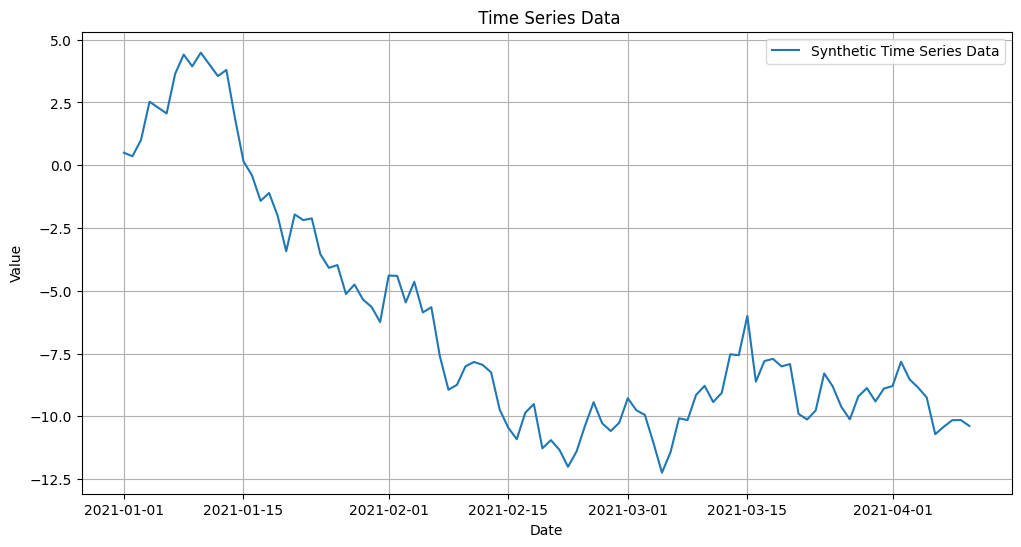

In [23]:
# Plotting the synthetic time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Synthetic Time Series Data')
plt.title(' Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Splitting the dataset into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [25]:
!pip install statsmodels

In [26]:

from statsmodels.tsa.arima.model import ARIMA

# Defining ARIMA order parameters
p, d, q = 1, 1, 1

# Fitting an ARIMA model to the training data
model = ARIMA(train['Value'], order=(p, d, q))
model_fit = model.fit()


In [27]:
# Generating forecasts for the test set
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(test['Value'], forecast_mean))
print(f'RMSE: {rmse:.2f}')


RMSE: 1.00


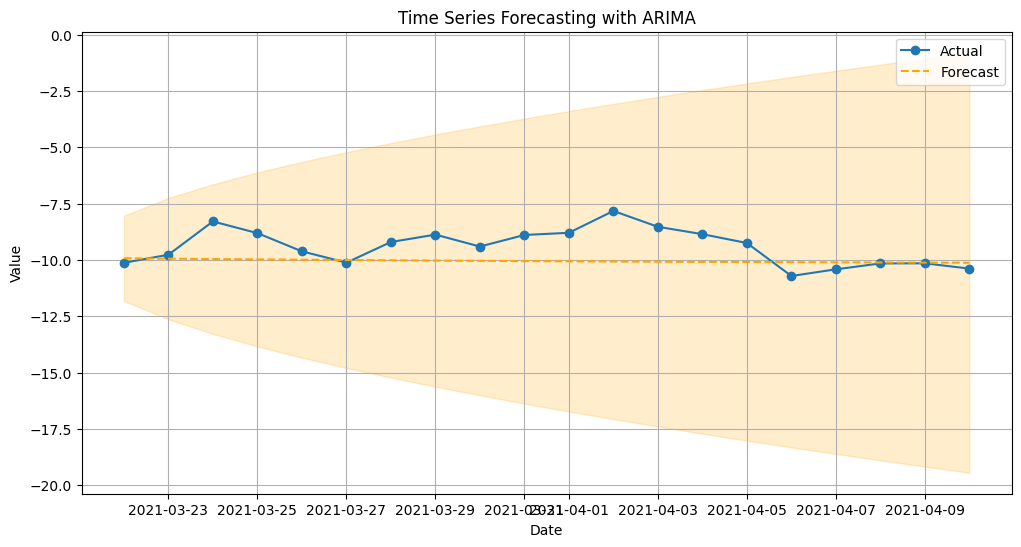

In [29]:
# Plotting the actual vs. forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['Value'], label='Actual', linestyle='-', marker='o')
plt.plot(test['Date'], forecast_mean, label='Forecast', linestyle='--', color='orange')
plt.fill_between(test['Date'], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
